<a href="https://colab.research.google.com/github/k47h4/scripts/blob/master/Copy_of_8_Decoupled_Recurrent_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting ../../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../MNIST_data/t10k-labels-idx1-ubyte.gz


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a differe

current iter :  0  Synthetic gradient:  156.57063099579148
current iter :  0  True gradient:  0.35499344745820566
current iter :  0  Synthetic gradient 2:  155.8130040184322
current iter :  0  True gradient 2:  2629.089637594177
current iter :  0  Total current cost:  22.613739046293986
current iter :  5  Synthetic gradient:  155.70370189759922
current iter :  5  True gradient:  0.5169993075652076
current iter :  5  Synthetic gradient 2:  153.83009572399118
current iter :  5  True gradient 2:  1932.3954403013488
current iter :  5  Total current cost:  83.2018851736764
current iter :  10  Synthetic gradient:  155.07235525510407
current iter :  10  True gradient:  2.8059505118525507
current iter :  10  Synthetic gradient 2:  152.4009296603056
current iter :  10  True gradient 2:  1874.2432310365361
current iter :  10  Total current cost:  49.99193341593822
current iter :  15  Synthetic gradient:  154.50551069078784
current iter :  15  True gradient:  3.842967920610994
current iter :  15 

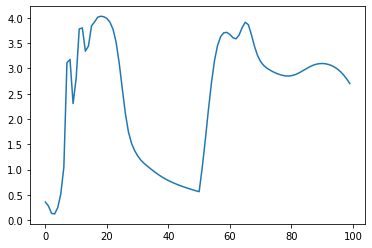

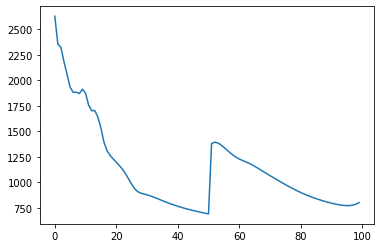

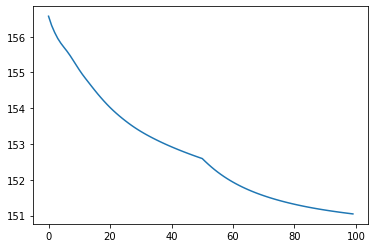

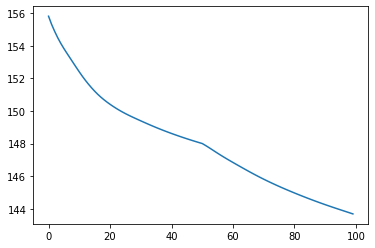

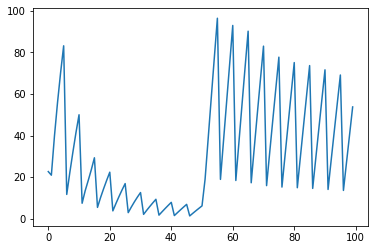


-------------------
Training Done Final Results
Results :  0.051049181248767964 Results Rounded:  0.0  GT:  [0]
Results :  0.21708842319184468 Results Rounded:  0.0  GT:  [0]
Results :  0.9274697860819796 Results Rounded:  1.0  GT:  [1]
Results :  0.07499759536027463 Results Rounded:  0.0  GT:  [0]
Results :  0.8937227684972501 Results Rounded:  1.0  GT:  [1]
Results :  0.8445988510403261 Results Rounded:  1.0  GT:  [1]
Results :  0.9506426243364553 Results Rounded:  1.0  GT:  [1]
Results :  0.6227226533568786 Results Rounded:  1.0  GT:  [1]
Results :  0.018062322721293222 Results Rounded:  0.0  GT:  [0]
Results :  0.09983938282827673 Results Rounded:  0.0  GT:  [1]
Results :  0.04450565809367799 Results Rounded:  0.0  GT:  [0]
Results :  0.04327795042220176 Results Rounded:  0.0  GT:  [0]
Results :  0.8760805197669103 Results Rounded:  1.0  GT:  [1]
Results :  0.9299808079546711 Results Rounded:  1.0  GT:  [1]
Results :  0.6819802275782594 Results Rounded:  1.0  GT:  [1]
Results :  0

In [5]:
import numpy as np,sys
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.examples.tutorials.mnist import input_data
np.random.seed(678)

def log(x):
    return 1 / (1 + np.exp(-1 * x))
def d_log(x):
    return log(x) * ( 1 - log(x))

def tanh(x):
    return np.tanh(x)
def d_tanh(x):
    return 1 - np.tanh(x) ** 2 

def ReLu(x):
    mask = (x > 0.0) * 1.0
    return x * mask
def d_ReLu(x):
    mask = (x > 0.0) * 1.0
    return mask    


# 0. Declare Training Data and Labels
mnist = input_data.read_data_sets("../../MNIST_data/", one_hot=False)
train = mnist.test
images, labels = train.images, train.labels
only_zero_index,only_one_index,only_two_index = np.where(labels==0)[0],np.where(labels==1)[0],np.where(labels==2)[0]
only_zero_image,only_zero_label = images[[only_zero_index]],np.expand_dims(labels[[only_zero_index]],axis=1)
only_one_image,only_one_label   = images[[only_one_index]],np.expand_dims(labels[[only_one_index]],axis=1)
only_two_image,only_two_label   = images[[only_two_index]],np.expand_dims(labels[[only_two_index]],axis=1)


images = np.vstack((only_zero_image,only_one_image))
labels = np.vstack((only_zero_label,only_one_label))
images,label = shuffle(images,labels)

test_image_num = 20
testing_images, testing_lables =images[:test_image_num,:],label[:test_image_num,:]
training_images,training_lables =images[test_image_num:test_image_num+100,:],label[test_image_num:test_image_num+100,:]

#surprise set, only 1 and 2
images_surprise = np.vstack((only_one_image,only_two_image))
labels_surprise = np.vstack((only_one_label,only_two_label))
images_surprise,label_surprise = shuffle(images_surprise,labels_surprise)

training_images_surprise,training_lables_surprise =images_surprise[test_image_num:test_image_num+100,:],label[test_image_num:test_image_num+100,:]


# 1. Declare the Hidden States and weights and hyper parameters
num_epoch = 100
h = np.zeros((images.shape[1],3))
wx = np.random.randn(784,784)  * 0.2
w_rec = np.random.randn(784,784)  * 0.2
w_fc = np.random.randn(784,1)* 0.2

w_sg_1 = np.random.randn(784,784)* 0.2
w_sg_2 = np.random.randn(784,784)* 0.2

lr_wx = 0.001
lr_wrec = 0.00001
lr_sg = 0.0001
total_cost = 0

True_grad_list = []
True_grad2_list = []
Syn_grad_list = []
Syn_grad2_list = []
Loss_list = []

for iter in range(num_epoch):
    if iter > 50:
      training_images = training_images_surprise
      training_lables = training_lables_surprise

    for current_image_index in range(len(training_images)):
        
        current_image = training_images[current_image_index]
        current_label = training_lables[current_image_index]

        l1 = h[:,0].dot(w_rec) + current_image.dot(wx)
        l1A = tanh(l1)
        h[:,1] = l1A

        # ----- Time Stamp 1 Syn Grad Update ------
        grad_1sg_part_1 = l1A.dot(w_sg_1)
        grad_1sg_part_2 = d_tanh(l1)
        grad_1sg_part_rec = h[:,0]
        grad_1sg_part_x = current_image

        grad_1sg_rec = grad_1sg_part_rec.T.dot(grad_1sg_part_1 * grad_1sg_part_2)
        grad_1sg_x = grad_1sg_part_x.T.dot(grad_1sg_part_1 * grad_1sg_part_2)
        
        w_rec = w_rec + lr_wrec * grad_1sg_rec
        wx = wx + lr_wrec * grad_1sg_x
        grad_true_0 = (grad_1sg_part_1 * grad_1sg_part_2).dot(w_rec.T)
        # ----- Time Stamp 1 Syn Grad Update ------
        
        l2 = h[:,1].dot(w_rec) + current_image.dot(wx)
        l2A = tanh(l2)
        h[:,2] = l2A

        # ----- Time Stamp 2 Syn Grad Update ------
        grad_2sg_part_1 = l2A.dot(w_sg_2)
        grad_2sg_part_2 = d_tanh(l2)
        grad_2sg_part_rec = h[:,1]
        grad_2sg_part_x = current_image

        grad_2sg_rec = grad_2sg_part_rec.T.dot(grad_2sg_part_1 * grad_2sg_part_2)
        grad_2sg_x = grad_2sg_part_x.T.dot(grad_2sg_part_1 * grad_2sg_part_2)
        
        w_rec = w_rec + lr_wrec * grad_2sg_rec
        wx = wx + lr_wrec * grad_2sg_x
        grad_true_1_from_2 = (grad_2sg_part_1 * grad_2sg_part_2).dot(w_rec.T)
        # ----- Time Stamp 2 Syn Grad Update ------

        # ----- Time Stamp 1 True Gradient Update ------
        grad_true_1_part_1 = grad_1sg_part_1 - grad_true_1_from_2
        grad_true_1_part_2 = h[:,1]
        grad_true_1 = np.expand_dims(grad_true_1_part_2,axis=0).T.dot(np.expand_dims(grad_true_1_part_1,axis=0))
        w_sg_1 = w_sg_1 - lr_sg * grad_true_1
        # ----- Time Stamp 1 True Gradient Update ------

        # ----- Fully Connected for Classification ------
        l3 = h[:,2].dot(w_fc)
        l3A = log(l3)
        cost = np.square(l3A - current_label).sum() * 0.5
        total_cost = total_cost + cost
        # ----------------------------------------------

        # ------- FC weight update ---------------------
        grad_fc_part_1 = l3A - current_label
        grad_fc_part_2 = d_log(l3)
        grad_fc_part_3 = h[:,2]
        grad_fc = np.expand_dims(grad_fc_part_3,axis=0).T.dot(np.expand_dims((grad_fc_part_1 * grad_fc_part_2),axis=0))
        w_fc = w_fc - lr_wx * grad_fc

        grad_true_2_from_3 = (grad_fc_part_1 * grad_fc_part_2).dot(w_fc.T)
        # ------- FC weight update ---------------------
        
        # ----- Time Stamp 2 True Gradient Update ------
        grad_true_2_part_1 = grad_2sg_part_1 - grad_true_2_from_3
        grad_true_2_part_2 = h[:,2]
        grad_true_2 = np.expand_dims(grad_true_2_part_2,axis=0).T.dot(np.expand_dims(grad_true_2_part_1,axis=0))
        w_sg_2 = w_sg_2 - lr_sg * grad_true_2
        # ----- Time Stamp 2 True Gradient Update ------
    True_grad_list.append(np.linalg.norm(grad_fc))
    True_grad2_list.append(np.linalg.norm(grad_true_2))
    Syn_grad_list.append(np.linalg.norm(w_sg_1))
    Syn_grad2_list.append(np.linalg.norm(w_sg_2))
    Loss_list.append(np.linalg.norm(total_cost))

    if iter % 5 == 0:
      print("current iter : ",iter, " Synthetic gradient: ",np.linalg.norm(w_sg_1),end='\n')
      print("current iter : ",iter, " True gradient: ",np.linalg.norm(grad_fc),end='\n')

      print("current iter : ",iter, " Synthetic gradient 2: ",np.linalg.norm(w_sg_2),end='\n')
      print("current iter : ",iter, " True gradient 2: ",np.linalg.norm(grad_true_2),end='\n')

      print("current iter : ",iter, " Total current cost: ",total_cost,end='\n')
      
      total_cost = 0








plt.plot(range(num_epoch), True_grad_list)
plt.show()

plt.plot(range(num_epoch), True_grad2_list)
plt.show()

plt.plot(range(num_epoch), Syn_grad_list)
plt.show()

plt.plot(range(num_epoch), Syn_grad2_list)
plt.show()

plt.plot(range(num_epoch), Loss_list)
plt.show()



print('\n-------------------')
print("Training Done Final Results")
predict = np.array([])
for current_image_index in range(len(testing_images)):
    current_image = testing_images[current_image_index]

    l1 = h[:,0].dot(w_rec) + current_image.dot(wx)
    l1A = tanh(l1)
    h[:,1] = l1A

    l2 = h[:,1].dot(w_rec) + current_image.dot(wx)
    l2A = tanh(l2)
    h[:,2] = l2A

    l3 = h[:,2].dot(w_fc)
    l3A = log(l3)

    predict = np.append(predict,l3A)

for i in range(len(predict)): 
    print("Results : ", predict[i],"Results Rounded: ", np.round(predict[i]), " GT: ", testing_lables[i])
print('-------------------\n')
# ------------ Normal Gate RNN Train -------





# -- end code --